# Data Retrieval and Preparation

Dataset was accessed through the provided API.

In [1]:
# Loading the necessary libraries

from urllib.request import urlopen
import json
import requests
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [2]:
# accessing the data

start_url = requests.get('https://openafrica.net/api/3/action/datastore_search?resource_id=e2bcc139-4c7a-4096-945b-912a0f8b5385')  
next_url = requests.get('https://openafrica.net/api/3/action/datastore_search?offset=100&resource_id=e2bcc139-4c7a-4096-945b-912a0f8b5385')

In [3]:
# Extract the JSON data from the response
data_one = start_url.json()
data_two = next_url.json()

In [4]:
# Extract the records from the data
records1 = data_one["result"]["records"]
records2 = data_two["result"]["records"]

In [5]:
#writing data in csv format
 
data1_csv = pd.DataFrame(records1)
data2_csv = pd.DataFrame(records2)

In [6]:
# combine the two datsets

Vaccine_df = pd.concat([data1_csv, data2_csv], ignore_index=True)
Vaccine_df.head()

,_id,state,vaccine,total
0,1,Abia,Any,95.5
1,2,Abia,Measles,86.4
2,3,Abia,Penta 1,95.5
3,4,Abia,Penta 2,90.9
4,5,Abia,Penta 3,86.4


In [7]:
# assessing information of the data

Vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      190 non-null    int64  
 1   state    190 non-null    object 
 2   vaccine  190 non-null    object 
 3   total    190 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


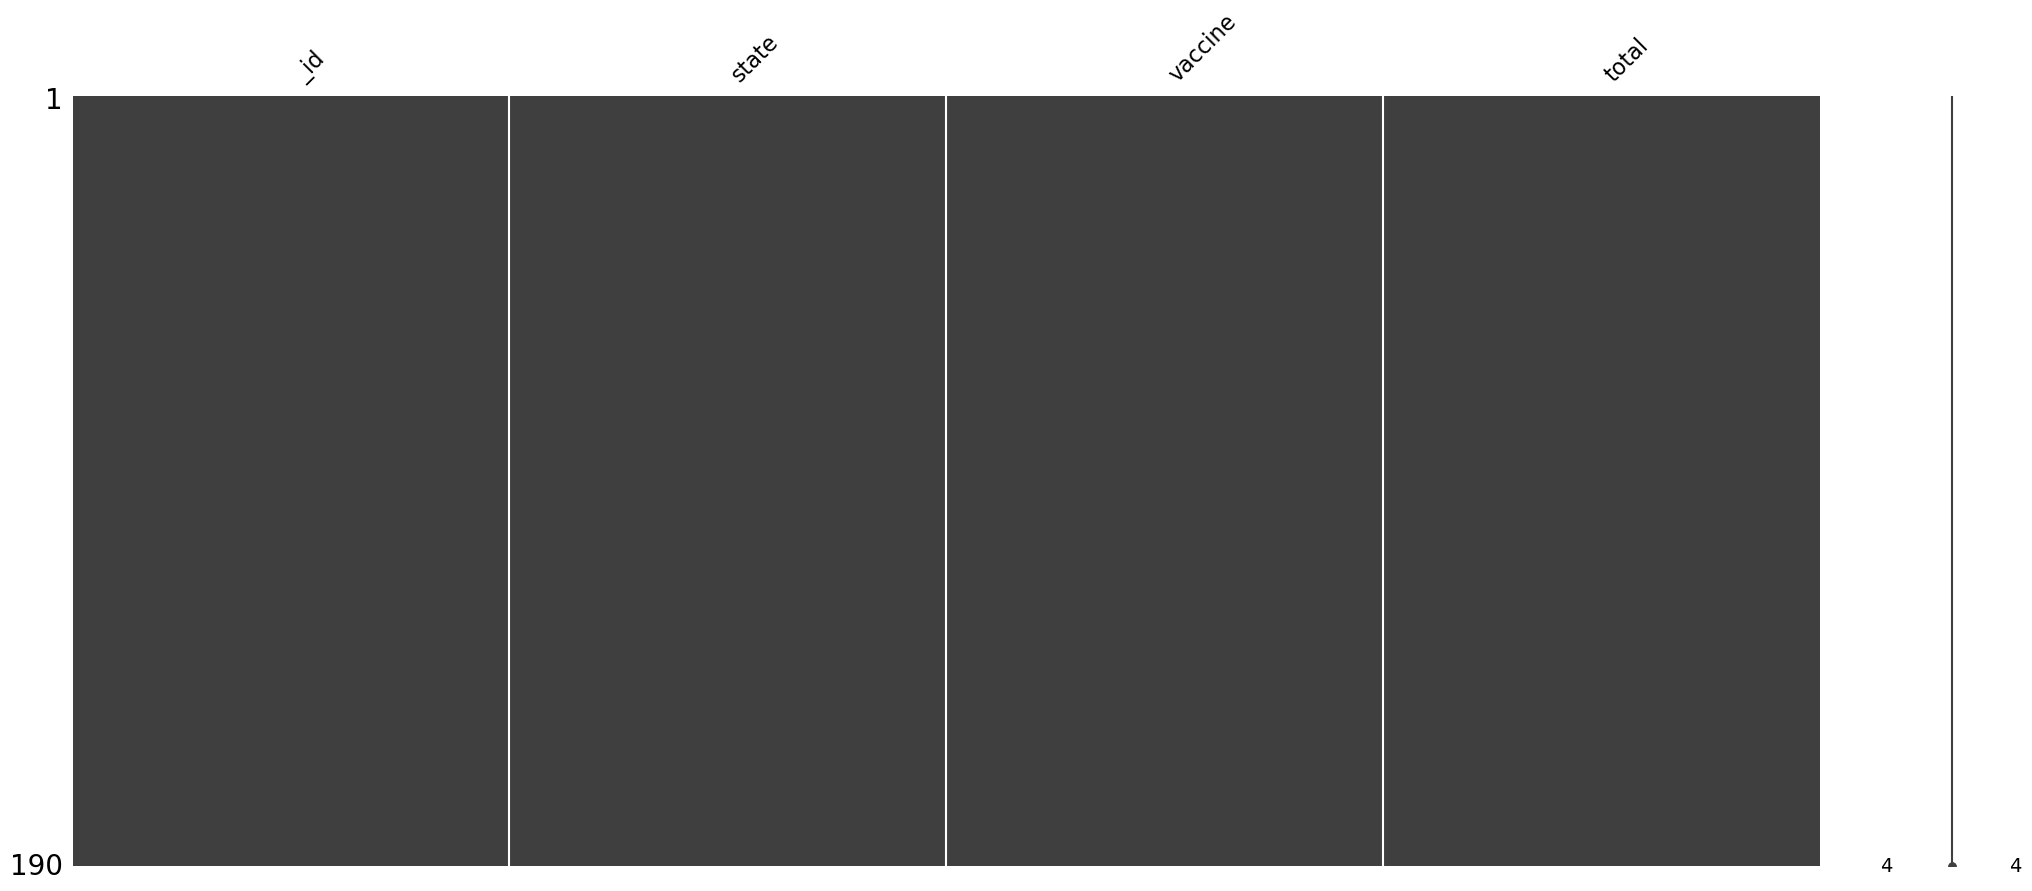

<Figure size 1500x900 with 0 Axes>

In [8]:
# checking missing data

msno.matrix(Vaccine_df)

plt.figure(figsize = (15,9))

plt.show()

In [9]:
# checking duplicates 
df_vacc = Vaccine_df.duplicated().any()
df_vacc

False

In [23]:
# state spelling

state_counts = Vaccine_df['state'].value_counts()
state_counts

Abia                         5
Ogun                         5
Kebbi                        5
Kogi                         5
Kwara                        5
Lagos                        5
Nasarawa                     5
Niger                        5
Nigeria                      5
Ondo                         5
Adamawa                      5
Osun                         5
Oyo                          5
Plateau                      5
Rivers                       5
Sokoto                       5
Taraba                       5
Yobe                         5
Katsina                      5
Kano                         5
Kaduna                       5
Jigawa                       5
Akwa Ibom                    5
Anambra                      5
Bauchi                       5
Bayelsa                      5
Benue                        5
Borno                        5
Cross River                  5
Delta                        5
Ebonyi                       5
Edo                          5
Ekiti   

In [10]:
# vaccine name

vaccine_counts = Vaccine_df['vaccine'].value_counts()
vaccine_counts

Any        38
Measles    38
Penta 1    38
Penta 2    38
Penta 3    38
Name: vaccine, dtype: int64

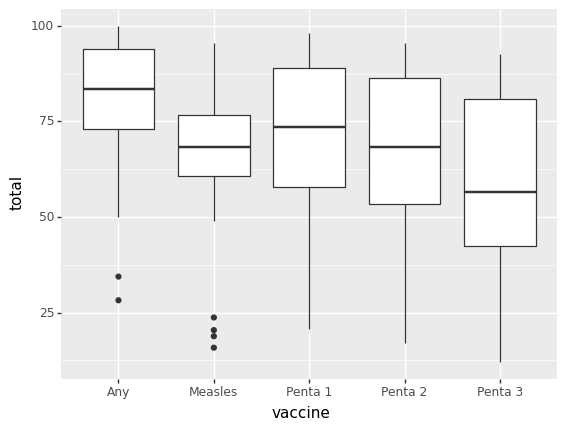

<ggplot: (158714991598)>

In [11]:
# checking for outliers

ggplot(Vaccine_df) + geom_boxplot(aes(x = 'vaccine',y = 'total'))

# Data Analysis

## EDA to gain understanding of vaccination rates

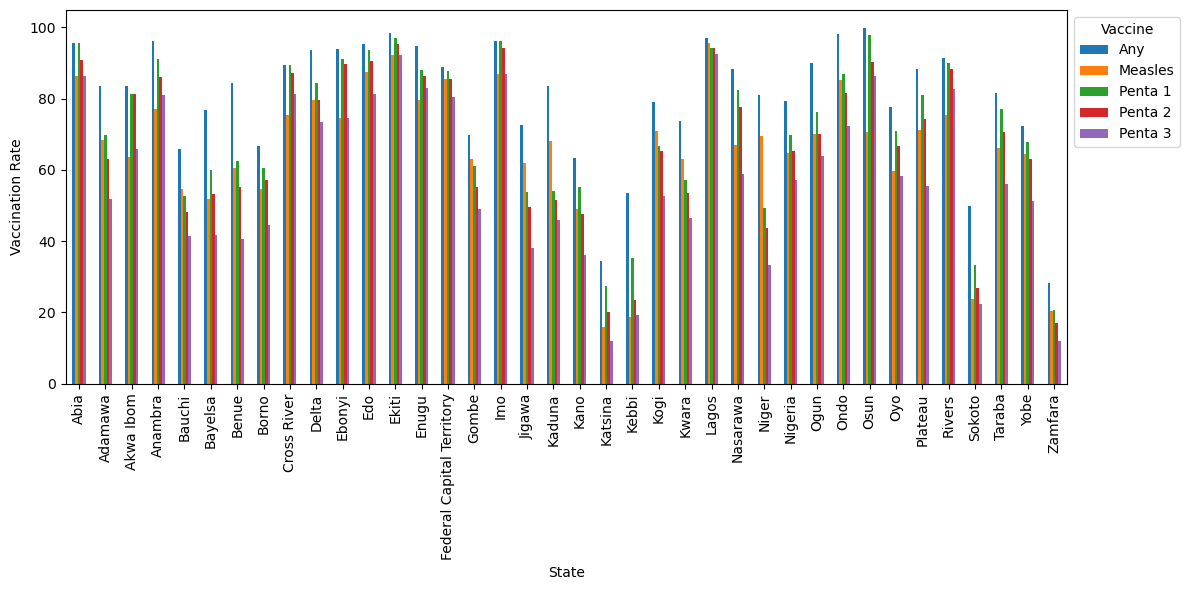

In [12]:
# Group the data by 'state' and 'vaccine' and calculate the mean vaccination rate

grouped_df = Vaccine_df.groupby(['state', 'vaccine'])['total'].mean().reset_index()

# Pivot the DataFrame to have 'Vaccine' as columns and 'State' as index

pivot_df = grouped_df.pivot(index='state', columns='vaccine', values='total')

# Plotting the bar graph

pivot_df.plot(kind='bar', figsize=(12, 6))

# Set the labels and title

plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('')

# Display the legend
plt.legend(title='Vaccine', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Filter rows per vaccine

Any_df = Vaccine_df[Vaccine_df['vaccine'] == 'Any']
Measles_df = Vaccine_df[Vaccine_df['vaccine'] == 'Measles']
Penta1_df = Vaccine_df[Vaccine_df['vaccine'] == 'Penta 1']
Penta2_df = Vaccine_df[Vaccine_df['vaccine'] == 'Penta 2']
Penta3_df = Vaccine_df[Vaccine_df['vaccine'] == 'Penta 3']

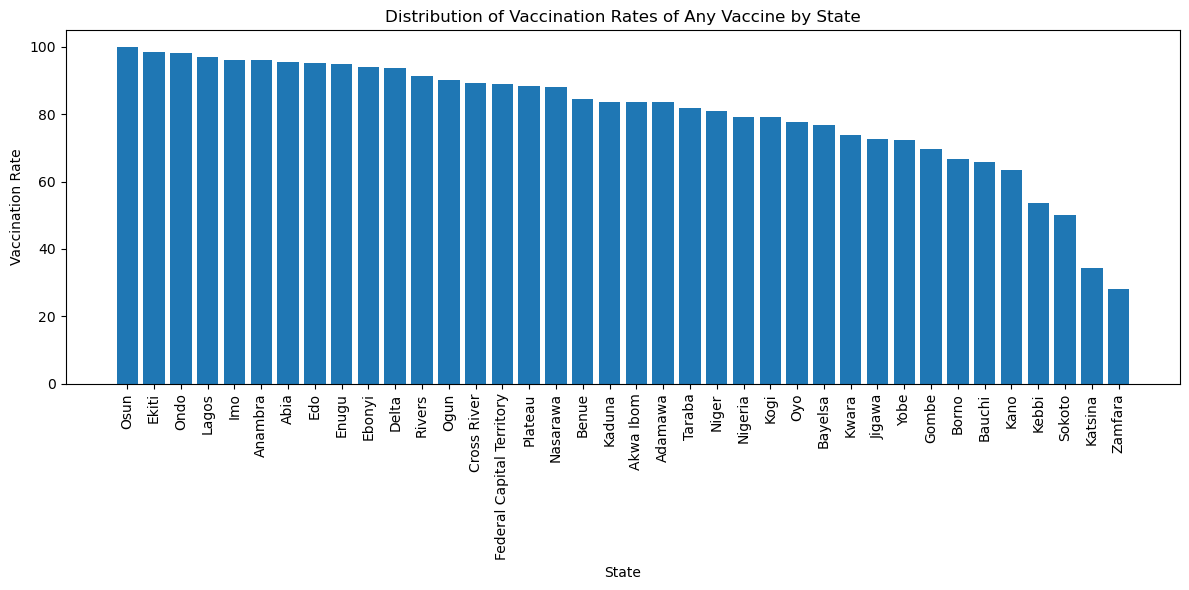

In [14]:
# Group the data by 'State' and calculate the mean vaccination rate
grouped_df = Any_df.groupby('state')['total'].mean().reset_index()

# Sort the data in descending order of vaccination rate
sorted_df = grouped_df.sort_values(by='total', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['state'], sorted_df['total'])

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('Distribution of Vaccination Rates of Any Vaccine by State')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

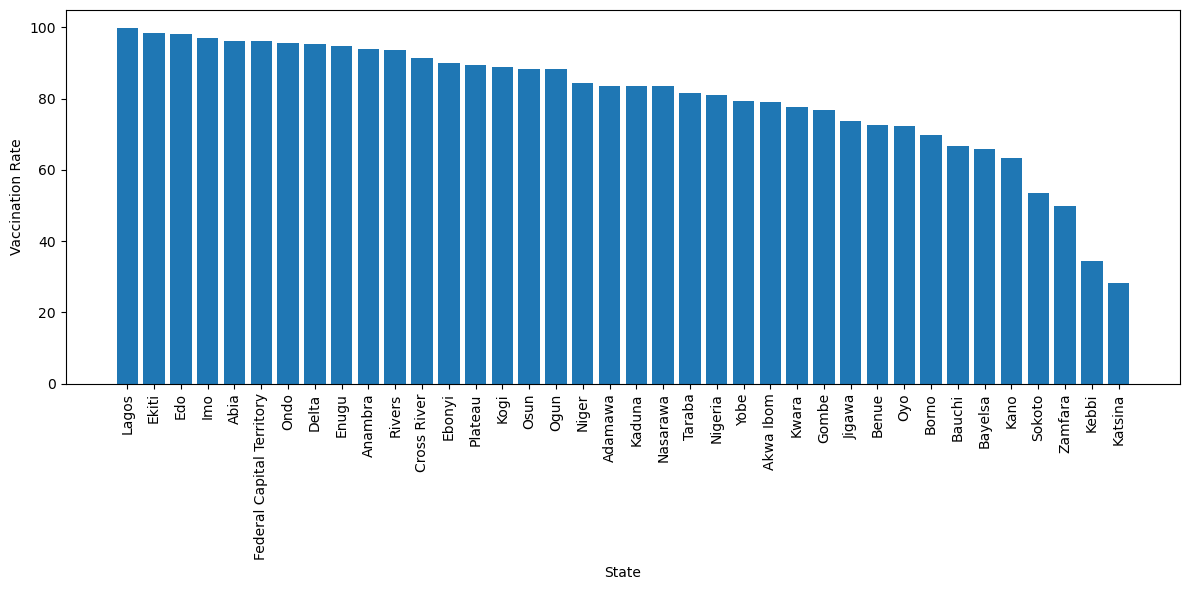

In [15]:
# Group the data by 'State' and calculate the mean vaccination rate
grouped_df = Measles_df.groupby('state')['total'].mean().reset_index()

# Sort the data in descending order of vaccination rate
sorted_df1 = grouped_df.sort_values(by='total', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df1['state'], sorted_df['total'])

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

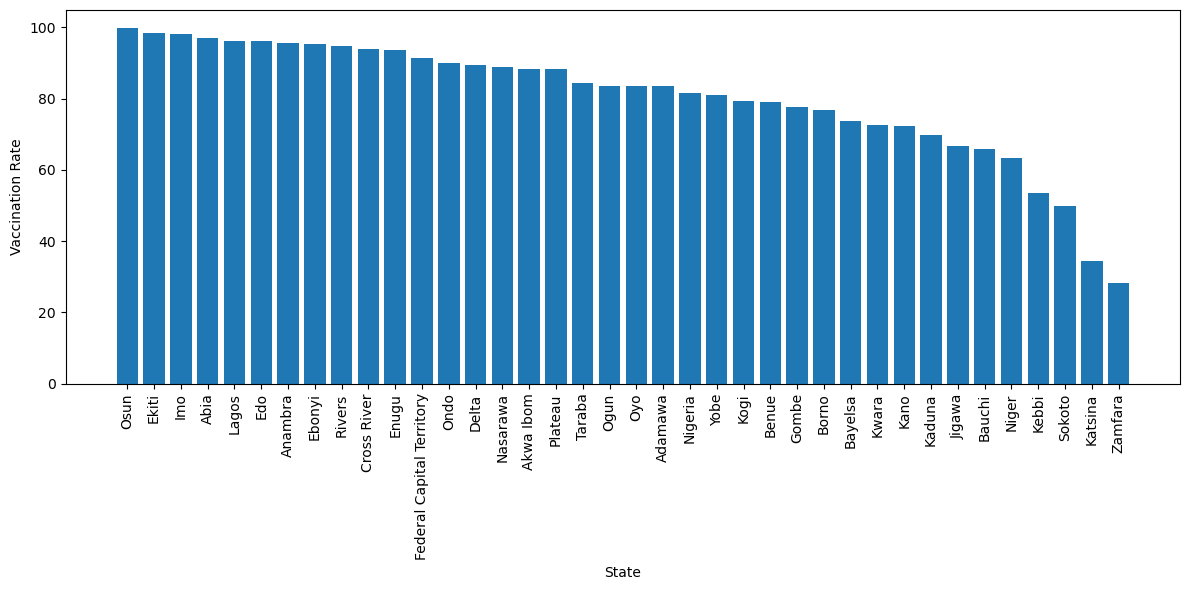

In [16]:
# Group the data by 'State' and calculate the mean vaccination rate
grouped_df = Penta1_df.groupby('state')['total'].mean().reset_index()

# Sort the data in descending order of vaccination rate
sorted_df2 = grouped_df.sort_values(by='total', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df2['state'], sorted_df['total'])

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
sorted_df1.tail()

,state,total
19,Kano,49.0
34,Sokoto,23.7
37,Zamfara,20.4
21,Kebbi,18.8
20,Katsina,15.8


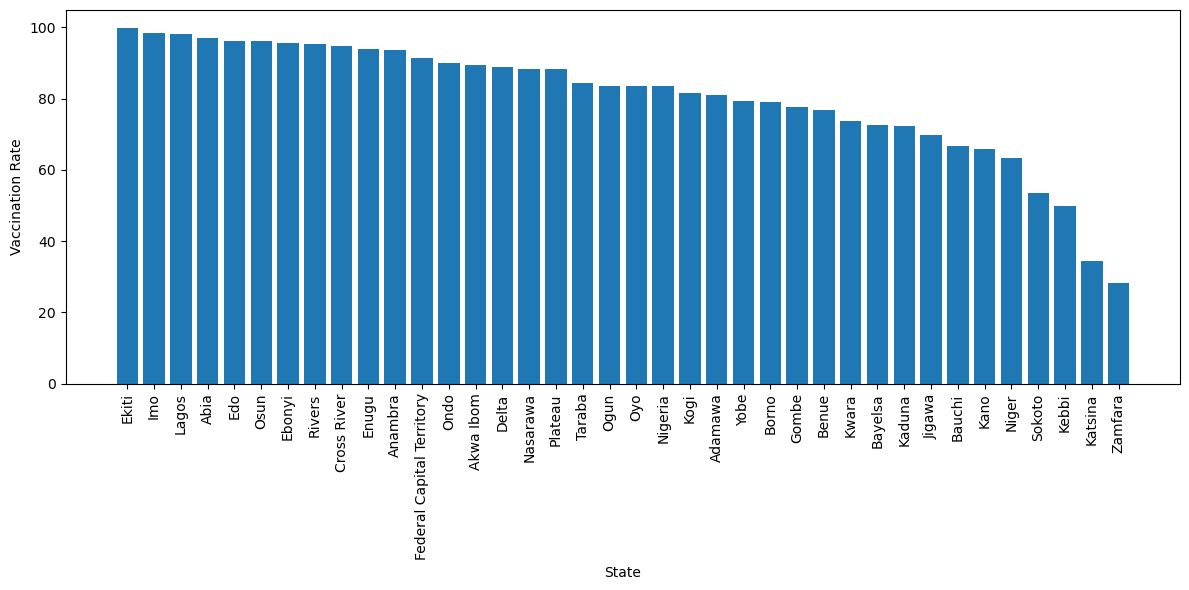

In [18]:
# Group the data by 'State' and calculate the mean vaccination rate
grouped_df = Penta2_df.groupby('state')['total'].mean().reset_index()

# Sort the data in descending order of vaccination rate
sorted_df3 = grouped_df.sort_values(by='total', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df3['state'], sorted_df['total'])

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
sorted_df3.tail()

,state,total
26,Niger,43.7
34,Sokoto,26.9
21,Kebbi,23.4
20,Katsina,20.1
37,Zamfara,17.1


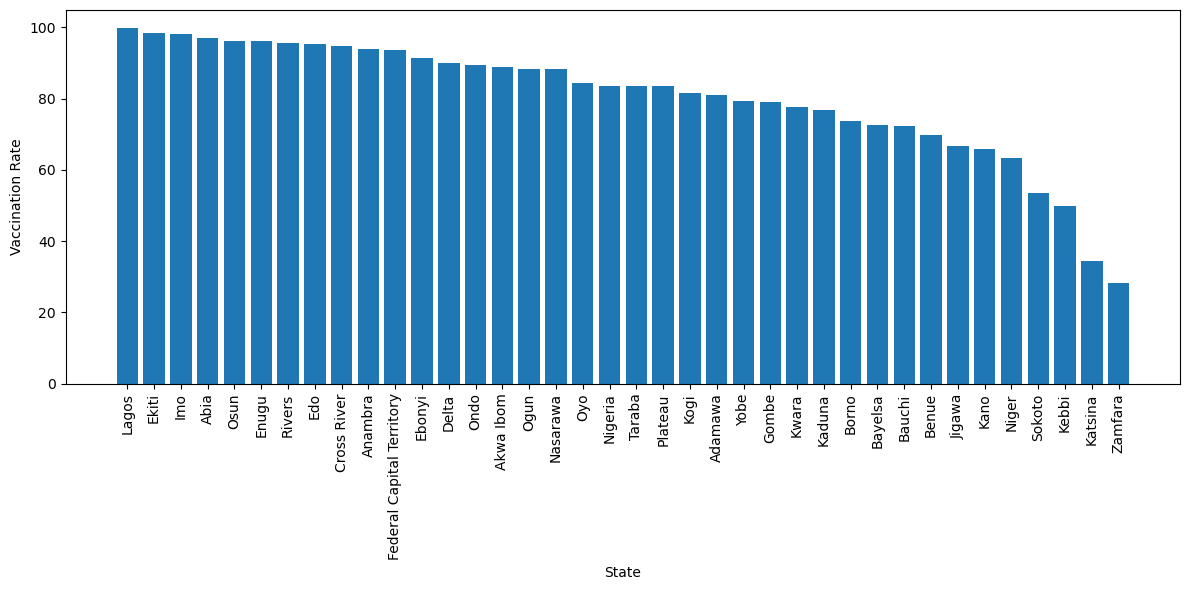

In [20]:
# Group the data by 'State' and calculate the mean vaccination rate
grouped_df = Penta3_df.groupby('state')['total'].mean().reset_index()

# Sort the data in descending order of vaccination rate
sorted_df4 = grouped_df.sort_values(by='total', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df4['state'], sorted_df['total'])

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.title('')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
sorted_df4.head()

,state,total
24,Lagos,92.6
12,Ekiti,92.3
16,Imo,86.8
0,Abia,86.4
30,Osun,86.3


In [22]:
# lowest vaccination rates by state

low_vaccine_rates = Vaccine_df.groupby('vaccine')['total'].min().reset_index()

Low_df = pd.merge(low_vaccine_rates, Vaccine_df, on=['vaccine', 'total'], how='left')
Low_df

,vaccine,total,_id,state
0,Any,28.2,186,Zamfara
1,Measles,15.8,102,Katsina
2,Penta 1,20.8,188,Zamfara
3,Penta 2,17.1,189,Zamfara
4,Penta 3,12.0,105,Katsina
5,Penta 3,12.0,190,Zamfara


In [23]:
# high vaccination rates

high_vaccine_rates = Vaccine_df.groupby('vaccine')['total'].max().reset_index()

High_df = pd.merge(high_vaccine_rates, Vaccine_df, on=['vaccine', 'total'], how='left')
High_df

,vaccine,total,_id,state
0,Any,99.9,151,Osun
1,Measles,95.6,122,Lagos
2,Penta 1,98.0,153,Osun
3,Penta 2,95.4,64,Ekiti
4,Penta 3,92.6,125,Lagos


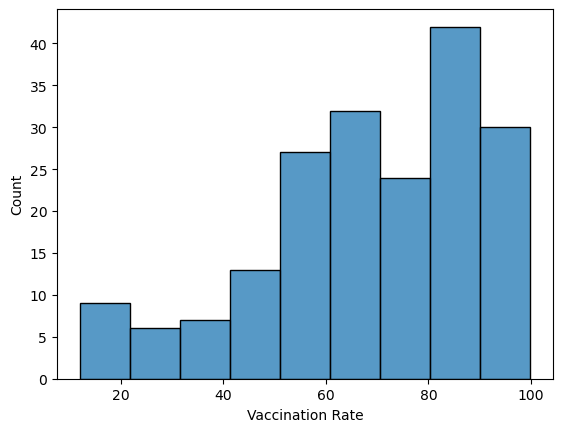

In [24]:
# distribution of vaccination rate
sns.histplot(data=Vaccine_df, x='total')
plt.xlabel('Vaccination Rate')
plt.show()

In [25]:
# saving the data

Vaccine_df.to_csv('Vaccination.csv', index=False)